## MLP for Classification

In [ ]:
#Import libraries
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
dataset = pd.read_excel("/content/drive/MyDrive/Deep Learning/Dry_Bean_Dataset.xlsx")
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#Encode
label_encoder = LabelEncoder()
dataset['Class'] = label_encoder.fit_transform(dataset['Class'])

X = dataset.drop(columns=['Class'])
y = dataset['Class']

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 64
output_size = len(label_encoder.classes_)

#Model
model = MLP(input_size, hidden_size, output_size)

#loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import matplotlib.pyplot as plt

loss_values = []
num_epochs = 300

# Training loop
for epoch in range(num_epochs):
    inputs = torch.FloatTensor(X_train)
    labels = torch.LongTensor(y_train.values)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


Epoch [1/300], Loss: 0.33791521191596985
Epoch [2/300], Loss: 0.33646878600120544
Epoch [3/300], Loss: 0.33504071831703186
Epoch [4/300], Loss: 0.3336302936077118
Epoch [5/300], Loss: 0.3322374224662781
Epoch [6/300], Loss: 0.3308616578578949
Epoch [7/300], Loss: 0.3295033276081085
Epoch [8/300], Loss: 0.3281620144844055
Epoch [9/300], Loss: 0.3268371522426605
Epoch [10/300], Loss: 0.32552915811538696
Epoch [11/300], Loss: 0.3242371678352356
Epoch [12/300], Loss: 0.3229614496231079
Epoch [13/300], Loss: 0.32170185446739197
Epoch [14/300], Loss: 0.3204580247402191
Epoch [15/300], Loss: 0.31923002004623413
Epoch [16/300], Loss: 0.31801721453666687
Epoch [17/300], Loss: 0.3168198764324188
Epoch [18/300], Loss: 0.3156377375125885
Epoch [19/300], Loss: 0.31447023153305054
Epoch [20/300], Loss: 0.31331735849380493
Epoch [21/300], Loss: 0.31217896938323975
Epoch [22/300], Loss: 0.3110545575618744
Epoch [23/300], Loss: 0.3099440038204193
Epoch [24/300], Loss: 0.3088468611240387
Epoch [25/300],

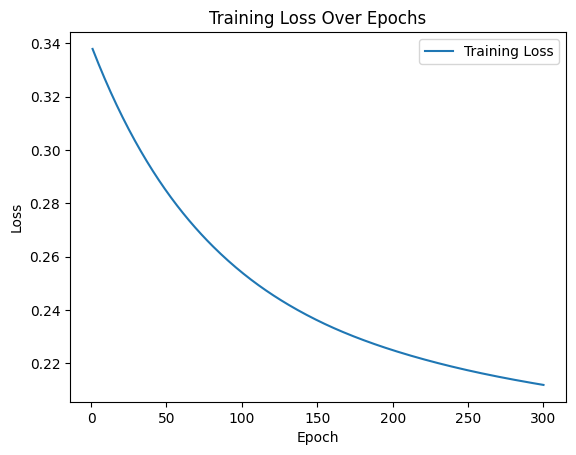

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(X_test)
    labels = torch.LongTensor(y_test.values)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == labels).sum().item() / len(labels)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 92.29%
